## exploration_lesson

In [1]:
import pandas as pd
import csv

import re
import unicodedata
import nltk

from prepare import basic_clean, lemmatize, remove_stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachelreuter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# bring in our data and set it up into a pandas df
# pd.DataFrame(prep_blogs(get_blogs()))

## Data Exploration
#### *In this lesson, we'll be taking a look at a data set that contains SMS messages that are labelled as either a spam text message, or an actual text message.*

In [3]:
df = pd.read_csv('/Users/rachelreuter/ds-methodologies/nlp/spam_clean.csv')

In [4]:
df.tail(5)

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.shape

(5572, 2)

In [6]:
df.columns

Index(['label', 'text'], dtype='object')

In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))

clean('Good morning ada! We"re doing data exploration!')

'good morning ada data exploration'

In [10]:
df.text = df.text.apply(clean)

In [11]:
df.tail(5)

,label,text
5567,spam,2nd time tried 2 contact u u a750 pound prize ...
5568,ham,b going esplanade fr home
5569,ham,pity wa mood soany suggestion
5570,ham,guy bitching acted like id interested buying s...
5571,ham,rofl true name


In [12]:
df.shape

(5572, 2)

In [13]:
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)

In [14]:
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)

In [15]:
pd.Series(all_text.split())

0                    go
1                jurong
2                 point
3                 crazy
4             available
5                 bugis
6                     n
7                 great
8                 world
9                    la
10                    e
11               buffet
12                 cine
13                  got
14                amore
15                  wat
16                   ok
17                  lar
18               joking
19                  wif
20                    u
21                  oni
22                 free
23                entry
24                    2
25                 wkly
26                 comp
27                  win
28                   fa
29                  cup
              ...      
53209               per
53210            minute
53211    btnationalrate
53212                 b
53213             going
53214         esplanade
53215                fr
53216              home
53217              pity
53218                wa
53219           

In [16]:
all_freq = pd.Series(all_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
ham_freq = pd.Series(ham_text.split()).value_counts()

In [17]:
spam_freq.sort_values(ascending=False)

call                                   359
free                                   216
2                                      173
u                                      155
txt                                    150
ur                                     144
text                                   137
mobile                                 135
4                                      119
claim                                  115
stop                                   113
reply                                  102
prize                                   94
get                                     83
tone                                    73
service                                 72
new                                     69
send                                    67
nokia                                   65
urgent                                  63
cash                                    62
week                                    62
win                                     61
no         

In [18]:
ham_freq.sort_values(ascending=False)

u               1042
im               449
not              406
get              314
2                305
ltgt             276
no               274
go               273
ok               272
dont             257
come             242
call             241
know             241
ur               240
ill              238
like             232
got              231
wa               225
good             223
day              214
time             213
love             193
want             183
need             171
one              170
4                168
going            167
lor              160
home             160
sorry            153
                ... 
1childish          1
wenwecan           1
browni             1
sized              1
resuming           1
senthilhsbc        1
destination        1
blacko             1
uk                 1
dengra             1
newsby             1
jacuzzi            1
doingwhat          1
inspection         1
yifeng             1
jelly              1
recreation   

In [37]:
word_counts = pd.concat([all_freq,spam_freq,ham_freq], sort=True, axis = 1)
word_counts.columns = ['all','spam','ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))
word_counts

,all,spam,ham
0,3,3,0
008704050406,2,2,0
0089my,1,1,0
0121,1,1,0
01223585236,1,1,0
01223585334,2,2,0
0125698789,1,0,1
02,1,1,0
020603,4,4,0
0207,2,2,0


In [20]:
word_counts.sort_values(by='all', ascending=False)

,all,spam,ham
u,1197,155.0,1042.0
call,600,359.0,241.0
2,478,173.0,305.0
im,462,13.0,449.0
not,430,24.0,406.0
get,397,83.0,314.0
ur,384,144.0,240.0
no,335,61.0,274.0
go,304,31.0,273.0
4,287,119.0,168.0


Let's first take a look at how many of the messages are spam vs ham:

In [21]:
word_counts['p_spam'] = word_counts.spam / word_counts['all']
word_counts['p_ham'] = word_counts.ham / word_counts['all']
word_counts

,all,spam,ham,p_spam,p_ham
0,3,3.0,0.0,1.000000,0.000000
008704050406,2,2.0,0.0,1.000000,0.000000
0089my,1,1.0,0.0,1.000000,0.000000
0121,1,1.0,0.0,1.000000,0.000000
01223585236,1,1.0,0.0,1.000000,0.000000
01223585334,2,2.0,0.0,1.000000,0.000000
0125698789,1,0.0,1.0,0.000000,1.000000
02,1,1.0,0.0,1.000000,0.000000
020603,4,4.0,0.0,1.000000,0.000000
0207,2,2.0,0.0,1.000000,0.000000


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

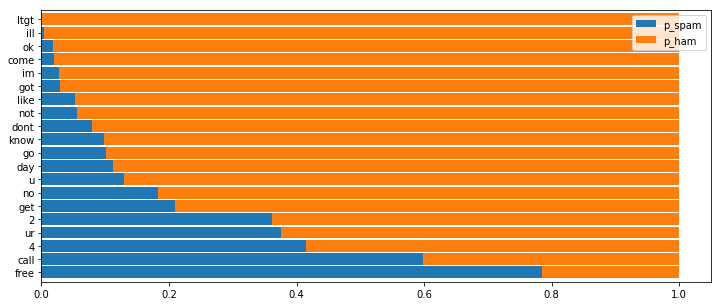

In [23]:
word_counts.sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True, figsize=(12,5), width=.9)

In [24]:
word_counts[(word_counts.spam > 10) & (word_counts.ham > 10)]\
    .assign(ratio=lambda df: df.spam / df.ham)\
    .sort_values(by='ratio')

,all,spam,ham,p_spam,p_ham,ratio
im,462,13.0,449.0,0.028139,0.971861,0.028953
good,235,12.0,223.0,0.051064,0.948936,0.053812
like,245,13.0,232.0,0.053061,0.946939,0.056034
not,430,24.0,406.0,0.055814,0.944186,0.059113
need,182,11.0,171.0,0.060440,0.939560,0.064327
dont,279,22.0,257.0,0.078853,0.921147,0.085603
time,232,19.0,213.0,0.081897,0.918103,0.089202
think,146,14.0,132.0,0.095890,0.904110,0.106061
know,267,26.0,241.0,0.097378,0.902622,0.107884
great,111,11.0,100.0,0.099099,0.900901,0.110000


In [25]:
# pip install WordCloud
from wordcloud import WordCloud

(-0.5, 1199.5, 999.5, -0.5)

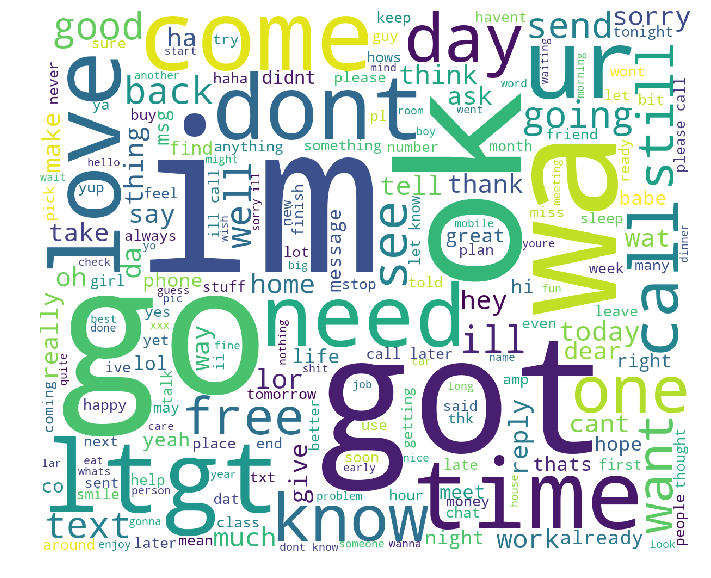

In [26]:
cloud = WordCloud(background_color='white', width=1200, height=1000).generate(all_text)
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 599.5, 799.5, -0.5)

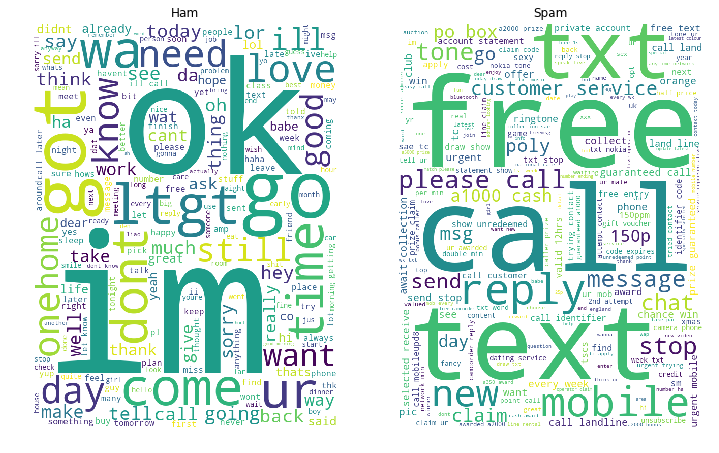

In [27]:
ham_cloud = WordCloud(background_color='white', width=600, height=800).generate(ham_text)
spam_cloud = WordCloud(background_color='white', width=600, height=800).generate(spam_text)

plt.figure(figsize=(12, 10))

plt.subplot(121)
plt.imshow(ham_cloud)
plt.title('Ham')
plt.axis('off')

plt.subplot(122)
plt.imshow(spam_cloud)
plt.title('Spam')
plt.axis('off')

In [28]:
import nltk

In [29]:
list(nltk.ngrams('Mary had a little lamb'.split(), 2))

[('Mary', 'had'), ('had', 'a'), ('a', 'little'), ('little', 'lamb')]

In [30]:
list(nltk.ngrams('Mary had a little lamb'.split(), 3))

[('Mary', 'had', 'a'), ('had', 'a', 'little'), ('a', 'little', 'lamb')]

In [31]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(please, call)         53
(call, later)          52
(ill, call)            48
(let, know)            41
(u, r)                 41
(r, u)                 40
(sorry, ill)           39
(im, not)              39
(dont, know)           38
(new, year)            32
(wan, 2)               31
(good, morning)        31
(customer, service)    29
(u, get)               26
(contact, u)           26
(take, care)           26
(po, box)              25
(im, going)            23
(u, wan)               23
(guaranteed, call)     23
dtype: int64

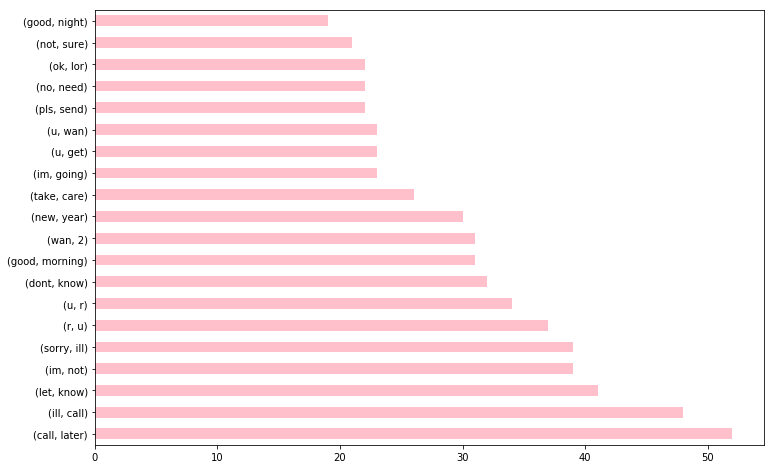

In [32]:
ham_bigrams = pd.Series(nltk.ngrams(ham_text.split(), 2))\
    .value_counts()

ham_bigrams\
    .head(20)\
    .plot.barh(figsize=(12,8),color='Pink')

In [33]:
frequencies = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}

(-0.5, 1199.5, 799.5, -0.5)

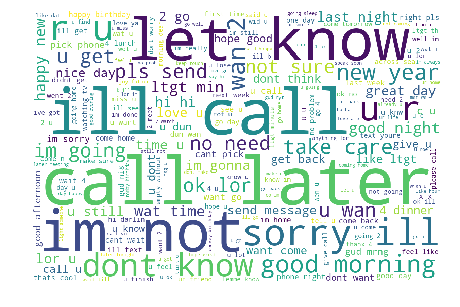

In [34]:
cloud = WordCloud(height=800, width=1200, background_color='white')
ham_cloud = cloud.generate_from_frequencies(frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(ham_cloud)
plt.axis('off')